In [1]:
import xarray as xr
import rasterio as rio
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from skimage import data, filters

In [2]:
work_dir = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12'
veloc_fn = f'{work_dir}/mintpy_offsets/velocityRg.h5'
#veloc_vh_fn = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/mintpy_offsets_vh/velocityRg.h5'
#dem_fn = '/mnt/Backups/gbrench/repos/fusits/nbs/imja/agu_push/AT12/work_vv/merged/geom_reference/hgt.rdr.full'

In [3]:
ds = xr.open_dataset(veloc_fn)
# vh_ds = xr.open_dataset(veloc_vh_fn)
# dem_ds = gdal.Open(dem_fn, gdal.GA_ReadOnly)
# dem = dem_ds.GetRasterBand(1).ReadAsArray()

In [4]:
veloc = np.flip(ds.velocity.values, 0)

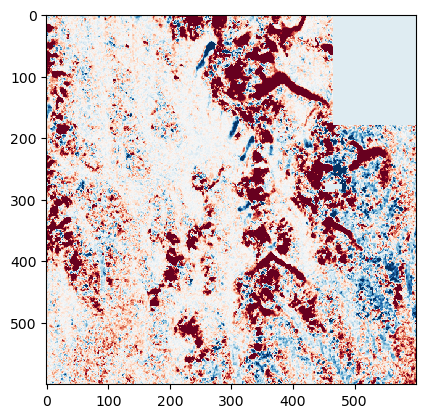

In [5]:
f, ax = plt.subplots()
ax.imshow(veloc[0:600, 200:800]-0.6, cmap='RdBu_r', vmin=-5, vmax=5, interpolation='none')

In [5]:
veloc_filtered = filters.butterworth(veloc,
                                     cutoff_frequency_ratio=0.35, #between 0 and 0.5
                                     order=2,
                                     high_pass=False)

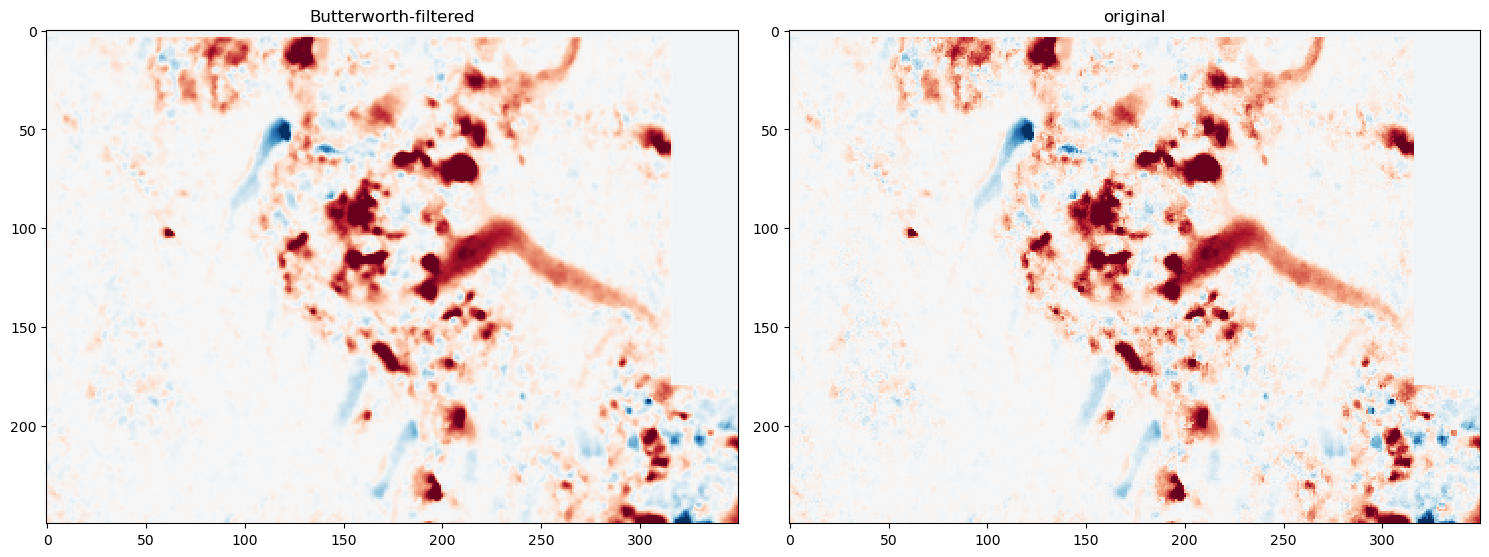

In [8]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow((veloc_filtered[0:250, 350:700]-0.6)*(12/365), cmap='RdBu_r', vmin=-0.70, vmax=0.70, interpolation='none')
ax[0].set_title('Butterworth-filtered')
ax[1].imshow((veloc[0:250, 350:700]-0.6)*(12/365), cmap='RdBu_r', vmin=-0.70, vmax=0.70, interpolation='none')
ax[1].set_title('original')
f.tight_layout()
f.savefig('velocity_filtering.png', dpi=400)

In [6]:
# convert to phase for simulated 12 day period
veloc_unwrapped = (veloc_filtered-0.6)*(3/365)*(12.5663706/0.05546576)

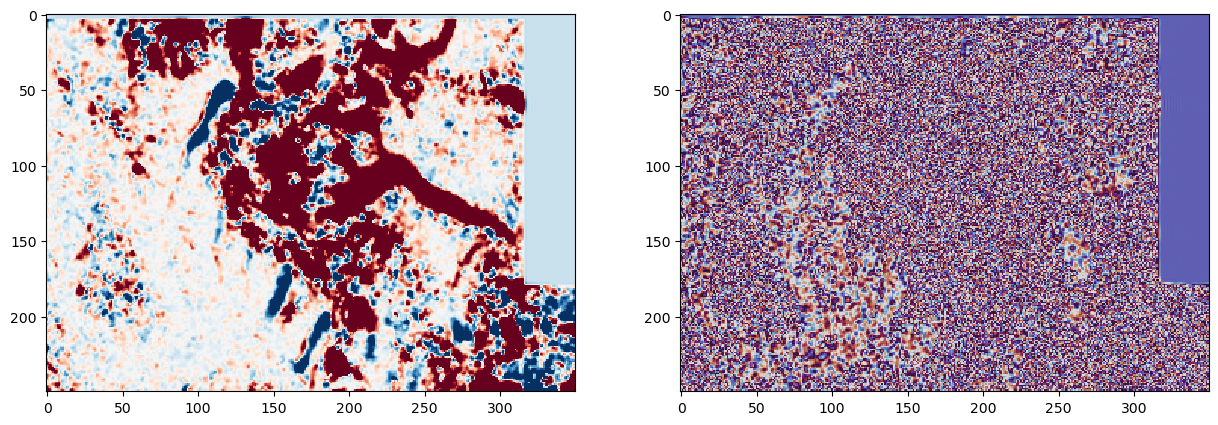

In [11]:
import seaborn as sns
#sns.set_theme()
f, ax = plt.subplots(1, 2, figsize=(15, 6))
l1 = ax[0].imshow(veloc_unwrapped[0:250, 350:700], cmap='RdBu_r', vmin=-20, vmax=20, interpolation='none')
#f.colorbar(l1, ax[0])
l2 = ax[1].imshow(veloc_wrapped[0:250, 350:700], cmap='twilight', vmin=-np.pi, vmax=np.pi, interpolation='none')

In [7]:
veloc_wrapped = np.subtract(np.mod(veloc_unwrapped,2*np.pi), np.pi)

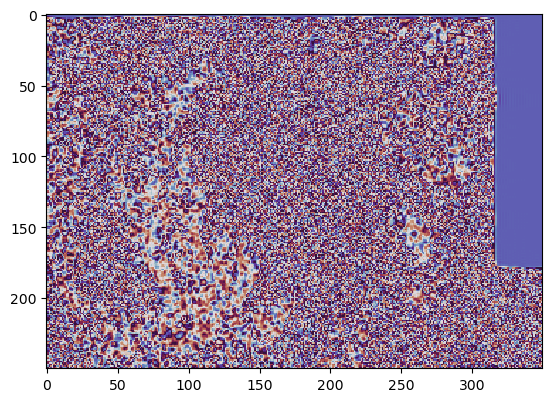

In [12]:
f, ax = plt.subplots()
ax.imshow(veloc_wrapped[0:250, 350:700], cmap='twilight', vmin=-np.pi, vmax=np.pi, interpolation='none')

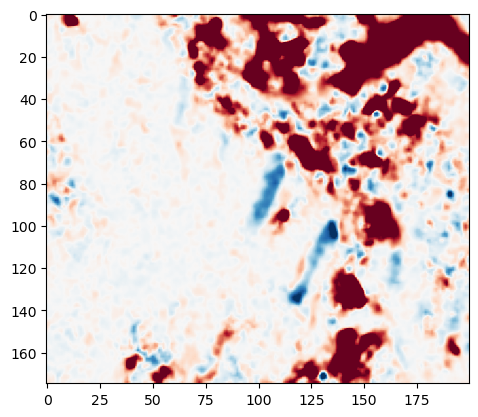

In [16]:
f, ax = plt.subplots()
ax.imshow(veloc_unwrapped[100:275, 400:600], cmap='RdBu_r', vmin=-60, vmax=60)

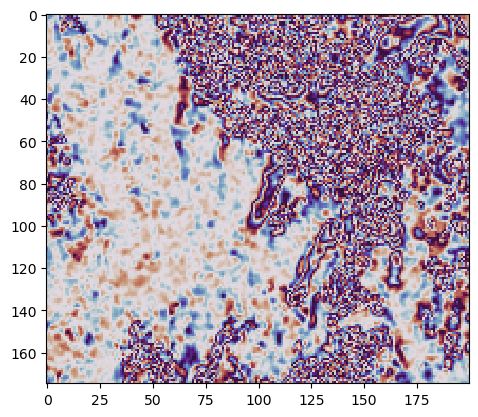

In [8]:
f, ax = plt.subplots()
ax.imshow(veloc_wrapped[100:275, 400:600], cmap='twilight', vmin=-np.pi, vmax=np.pi, interpolation='none')

In [ ]:
# # filter range offset
# def prep_for_filter(da):
#     array = da.values
#     distance_from_mean = np.abs(array - np.mean(array))
#     max_deviations = 2
#     not_outlier = distance_from_mean < max_deviations * np.std(array)
#     da = da.where(not_outlier) #filter outliers
    
#     da = da.interpolate_na(dim='x', use_coordinate=False) # interpolate small gaps
#     da = da.interpolate_na(dim='y', use_coordinate=False)

#     array = np.nan_to_num(da, 0) # set nans to 0
    
#     return array

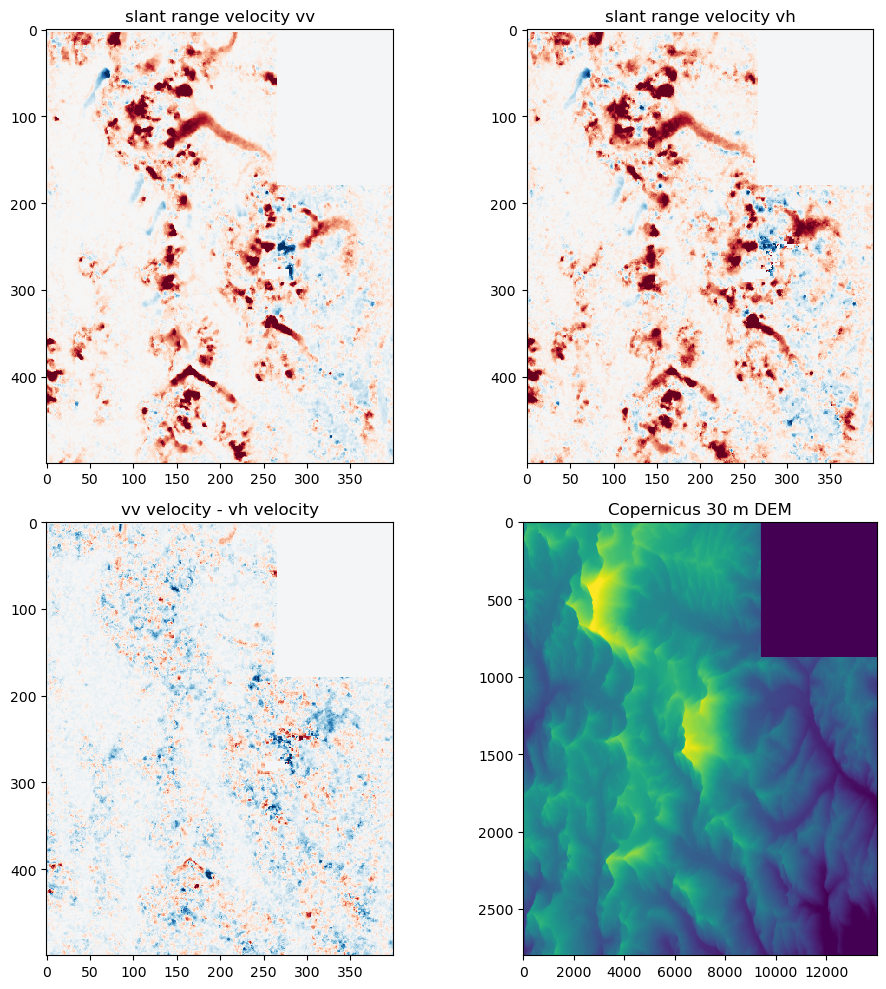

In [20]:
# f, ax = plt.subplots(2, 2, figsize=(10, 10))
# pos = ax[0, 0].imshow(np.flip(vv_ds.velocity, 0)[0:500, 400:800]-0.4, cmap = 'RdBu_r', vmin=-20, vmax=20, interpolation='none')
# ax[0, 0].set_title('slant range velocity vv')
# pos = ax[0, 1].imshow(np.flip(vh_ds.velocity, 0)[0:500, 400:800]-0.4, cmap = 'RdBu_r', vmin=-20, vmax=20, interpolation='none')
# ax[0, 1].set_title('slant range velocity vh')

# pos = ax[1, 0].imshow(np.flip(vv_ds.velocity-vh_ds.velocity, 0)[0:500, 400:800]-0.4, cmap = 'RdBu_r', vmin=-20, vmax=20, interpolation='none')
# ax[1, 0].set_title('vv velocity - vh velocity')

# ax[1, 1].imshow(np.flip(dem, (0))[0:2800, 12500:26500], vmin=3000, vmax=8000)
# ax[1, 1].set_title('Copernicus 30 m DEM')
# ax[1, 1].set_aspect(6.13)

# #f.colorbar(pos, ax=ax[0], shrink=0.4)

# f.tight_layout()
# #f.savefig('mean_velocity.png', dpi=400)